In [13]:
import sys
import os
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
import scipy.signal as sps


plt.rcParams["figure.figsize"] = (20, 9) # (w, h)


In [3]:
filelist = []
for file in os.listdir(r"C:\Users\jychou\jupyter project\adas_log"):
    #print(file)
    #filelist.append(file)
    
    t = (r"C:\Users\jychou\jupyter project\adas_log",file)
    s = '\\'
    s = s.join(t)
    filelist.append(s)

In [4]:
filelist

['C:\\Users\\jychou\\jupyter project\\adas_log\\log_logcat@20210105_11-52-47-098.log',
 'C:\\Users\\jychou\\jupyter project\\adas_log\\log_logcat@20210105_11-52-53-000.log',
 'C:\\Users\\jychou\\jupyter project\\adas_log\\log_logcat@20210105_11-52-53-000.log.01',
 'C:\\Users\\jychou\\jupyter project\\adas_log\\log_logcat@20210105_11-52-53-000.log.02',
 'C:\\Users\\jychou\\jupyter project\\adas_log\\log_logcat@20210105_11-52-53-000.log.03',
 'C:\\Users\\jychou\\jupyter project\\adas_log\\log_logcat@20210105_11-52-53-000.log.04',
 'C:\\Users\\jychou\\jupyter project\\adas_log\\log_logcat@20210105_11-52-53-000.log.05',
 'C:\\Users\\jychou\\jupyter project\\adas_log\\log_logcat@20210105_11-52-53-000.log.06',
 'C:\\Users\\jychou\\jupyter project\\adas_log\\log_logcat@20210105_11-52-53-000.log.07',
 'C:\\Users\\jychou\\jupyter project\\adas_log\\log_logcat@20210105_11-52-53-000.log.08']

In [5]:
#parse log and create clear raw_data
l1_a = []
l1_b = []
l1_c = []
l1_d = []

r1_a = []
r1_b = []
r1_c = []
r1_d = []




def parse_raw_data(raw_data):
    result_list = raw_data.split(",")
    #display(result)
    for mystr in result_list:
        if "l1_a" in mystr:
            value_list = mystr.split("=")
            l1_a.append(float(value_list[1]))
        elif "l1_b" in mystr:
            value_list = mystr.split("=")
            l1_b.append(float(value_list[1]))
        elif "l1_c" in mystr:
            value_list = mystr.split("=")
            l1_c.append(float(value_list[1]))
        elif "l1_d" in mystr:
            value_list = mystr.split("=")
            l1_d.append(float(value_list[1]))
        elif "r1_a" in mystr:
            value_list = mystr.split("=")
            r1_a.append(float(value_list[1]))
        elif "r1_b" in mystr:
            value_list = mystr.split("=")
            r1_b.append(float(value_list[1]))
        elif "r1_c" in mystr:
            value_list = mystr.split("=")
            r1_c.append(float(value_list[1]))
        elif "r1_d" in mystr:
            value_list = mystr.split("=")
            r1_d.append(float(value_list[1]))
            

for file in filelist:
    rawdata_counter = 0
    with open(file,"r",encoding="utf-8",errors='ignore') as F:
        raw_data = F.readline()
        #lines = F.readlines()
        
        while raw_data:
            if "l1_a" in raw_data:
                #print(raw_data)
                parse_raw_data(raw_data)
                rawdata_counter = rawdata_counter + 1
            try:
                raw_data = F.readline()
            except Exception as e:
                print(e)
                break
        print(f"parse {rawdata_counter} line")
            

    
    

parse 87 line
parse 247 line
parse 483 line
parse 465 line
parse 462 line
parse 444 line
parse 425 line
parse 436 line
parse 478 line
parse 240 line


(array([   8.,    5.,    9.,   52.,  106.,  156.,  418., 1736.,  777.,
         195.,  109.,   75.,  118.,    0.,    3.]),
 array([-5.        , -4.58866667, -4.17733333, -3.766     , -3.35466667,
        -2.94333333, -2.532     , -2.12066667, -1.70933333, -1.298     ,
        -0.88666667, -0.47533333, -0.064     ,  0.34733333,  0.75866667,
         1.17      ]),
 <a list of 15 Patch objects>)

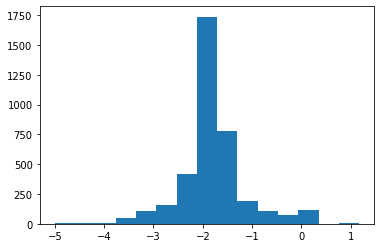

In [6]:
l1_a
plt.hist(r1_a, bins=15)

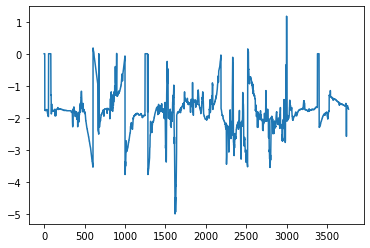

In [7]:
plt.plot(r1_a)

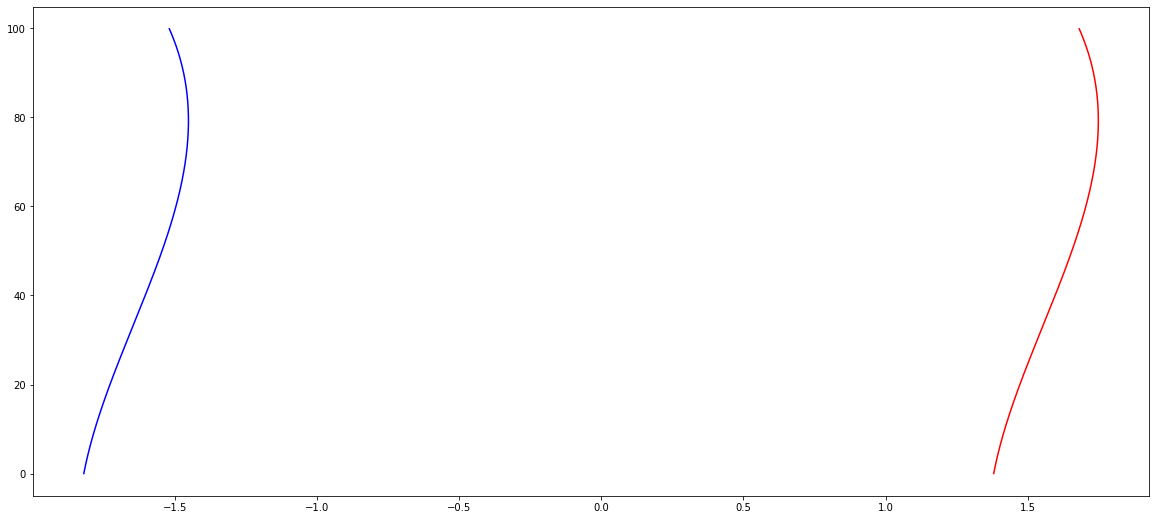

In [14]:
# evenly sampled time at 200ms intervals
z = np.arange(0., 100, 0.1)
index = 724

plt.plot( l1_d[index] * (z**3) + l1_c[index] * (z**2) + l1_b[index] * (z) + l1_a[index], z,'r-')
plt.plot( r1_d[index] * (z**3) + r1_c[index] * (z**2) + r1_b[index] * (z) + r1_a[index], z,'b-')
plt.show()

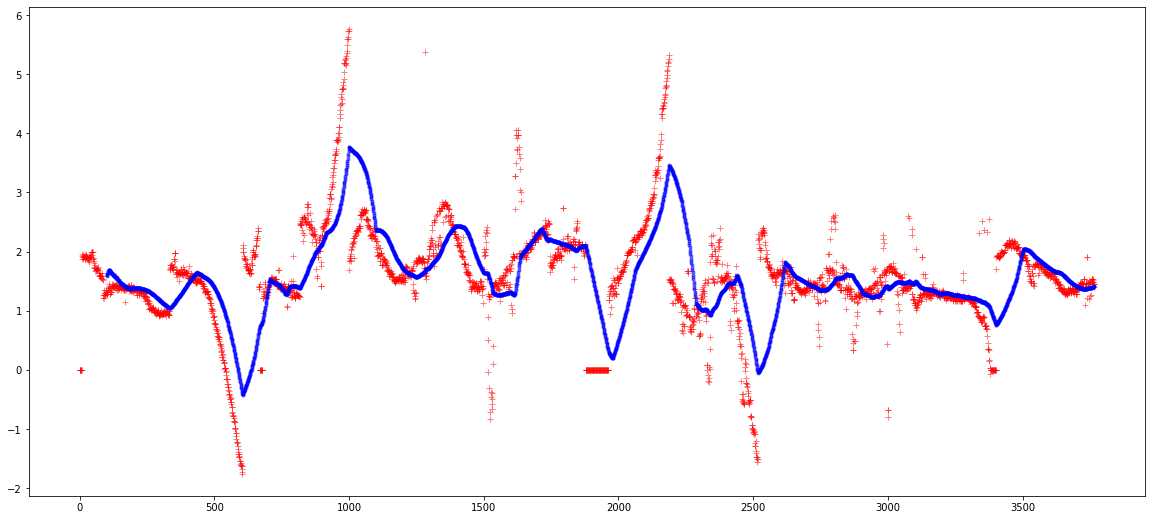

In [26]:
z = 30
t = np.arange(0,len(l1_d))
x_list = []
xavg_list = []
for tt in t:
    x = l1_d[int(tt)] * (z**3) + l1_c[int(tt)] * (z**2) + l1_b[int(tt)] * (z) + l1_a[int(tt)]
    x_list.append(x)
plt.plot(t, x_list , 'r+',alpha=0.5)   


l1_d_avg_list = []
l1_c_avg_list = []
l1_b_avg_list = []
l1_a_avg_list = []
window = 100

t2 = np.arange(window,len(l1_d))

for i in range(window,len(x_list)):
    l1_d_avg = sum(l1_d[i-window:i]) /window
    l1_d_avg_list.append(l1_d_avg)
    
    l1_c_avg = sum(l1_c[i-window:i]) /window
    l1_c_avg_list.append(l1_c_avg)
    

    l1_b_avg = sum(l1_b[i-window:i]) /window
    l1_b_avg_list.append(l1_b_avg)  
    
    l1_a_avg = sum(l1_a[i-window:i]) /window
    l1_a_avg_list.append(l1_a_avg)  

t = np.arange(0,len(l1_d)-window)
for tt in t:
    xavg = l1_d_avg_list[int(tt)] * (z**3) + l1_c_avg_list[int(tt)] * (z**2) + l1_b_avg_list[int(tt)] * (z) + l1_a_avg_list[int(tt)]
    xavg_list.append(xavg)
plt.plot(t2, xavg_list , 'b.',alpha=0.5)    




#plt.show()

In [10]:
sum(l1_d[:])

-0.006118000000000212

ValueError: x and y must have same first dimension, but have shapes (3737,) and (3767,)

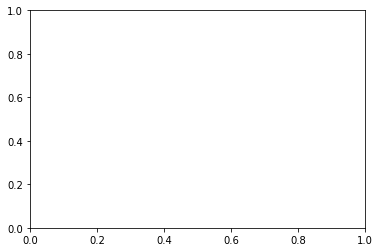

In [11]:
medfilt_xlist =sps.medfilt(x_list,kernel_size= 31)
plt.plot(t, x_list , 'r-')
plt.plot(t, medfilt_xlist , 'g-')

In [ ]:
frame = np.arange(0,len(l1_d))
fig = plt.figure(figsize=(7, 6), dpi=100)
def animate(z):
    
    line, = plt.plot(z, l1_d[0] * (z**3) + l1_c[0] * (z**2) + l1_b[0] * (z) + l1_a[0], 'r-')
    return line,

line, = plt.plot(z, l1_d[0] * (z**3) + l1_c[0] * (z**2) + l1_b[0] * (z) + l1_a[0], 'r-')
# create animation using the animate() function
myAnimation = animation.FuncAnimation(fig, animate, frame, \
                                      interval=1, blit=True, repeat=True)
HTML(myAnimation.to_html5_video())

In [ ]:
line = plt.plot(z, l1_d[0] * (z**3) + l1_c[0] * (z**2) + l1_b[0] * (z) + l1_a[0], 'r-')